In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from skbayes.mixture_models import VBBMM

In [3]:
import seaborn as sns
sns.set(color_codes=True)

# Preprocess

In [43]:
targetDir = "../data/output/result/"
speedDir = "../data/output/speed/"
brakeDir = "../data/output/brake/"
accelDIr = "../data/output/accel/"
steeringPositiveDir = "../data/output/steeringPositive/"
steeringNegativeDir = "../data/output/steeringNegative/"

In [5]:
df1 = pd.read_csv(speedDir + "result.csv")
df2 = pd.read_csv(brakeDir + "result.csv")
df2.columns = [["id", "brake"]]
df3 = pd.read_csv(accelDIr + "result.csv")
df3.columns = [["id", "accel"]]
df4 = pd.read_csv(steeringPositiveDir + "result.csv")
df4.columns = [["id", "steeringPositive"]]
df5 = pd.read_csv(steeringNegativeDir + "result.csv")
df5.columns = [["id", "steeringNegative"]]

In [6]:
df = pd.merge(pd.merge(pd.merge(pd.merge(df1, df2, on="id"), df3, on="id"), df4, on="id"), df5, on="id")

In [7]:
rmf = df[df['red'] + df['yellow'] + df['green'] + df['stop'] > 0]
rmf = rmf[["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive",  "steeringNegative"]]

In [21]:
rmf["sum"] = rmf["red"] + rmf["yellow"] + rmf["green"] + rmf["brake"] + rmf["accel"] + rmf["steeringPositive"] + rmf["steeringNegative"]

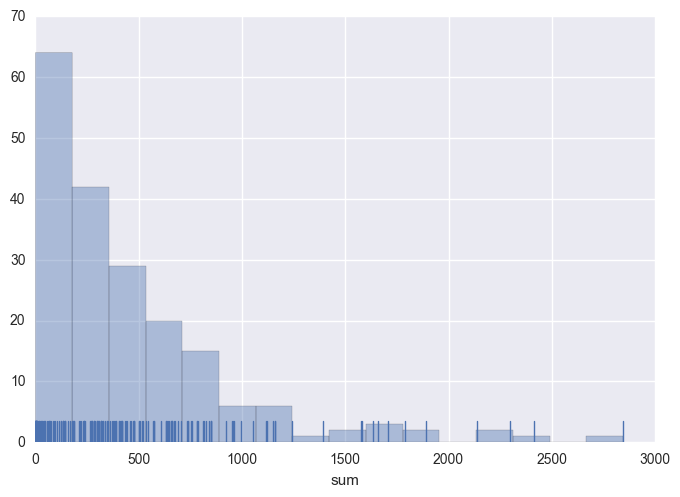

In [22]:
sns.distplot(rmf["sum"], kde=False, rug=True)

In [54]:
af = rmf[rmf["sum"] > 200]

In [55]:
len(af)

125

In [56]:
af =  af[["red", "yellow", "green", "brake", "accel", "steeringPositive", "steeringNegative"]]

In [57]:
af.describe()

,red,yellow,green,brake,accel,steeringPositive,steeringNegative
count,125.00000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000
mean,32.38400,203.960000,107.208000,60.60800,89.024000,70.008000,105.408000
std,50.15553,95.611394,142.120763,64.13065,77.410663,120.563228,241.090168
min,0.00000,2.000000,0.000000,0.00000,3.000000,1.000000,0.000000
25%,0.00000,137.000000,0.000000,11.00000,24.000000,2.000000,0.000000
50%,4.00000,194.000000,40.000000,39.00000,73.000000,11.000000,7.000000
75%,51.00000,258.000000,168.000000,92.00000,122.000000,60.000000,84.000000
max,188.00000,543.000000,709.000000,321.00000,389.000000,527.000000,1460.000000


In [91]:
nf = af.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [92]:
nf.index

Int64Index([ 103,  104,  142,  144,  181,  182,  184,  221,  260,  261,
            ...
            1331, 1337, 1338, 1367, 1407, 1408, 1447, 1448, 1488, 1528],
           dtype='int64', length=125)

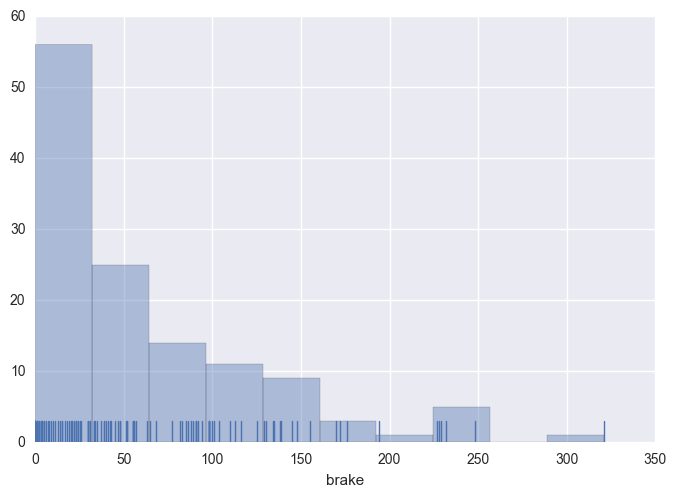

In [58]:
sns.distplot(af["brake"], kde=False, rug=True)

In [59]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=0.00001).fit(af)
set(vb.predict(af))

{0, 1, 2, 3, 4, 5, 6}

In [60]:
pred = zip(rmf.index, vb.predict(af))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters5.csv", result, delimiter=",", fmt="%d")

In [82]:
pd.__version__

u'0.19.0'